In [74]:
import json
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
import numpy as np

# Date time helper functions

## Avisi date time to date time python object and datetime python object to float value

In [64]:
# Turn Avisi Datetime string to python DateTime object
def avisi_str_to_datetime(avisi_str):
    dt_pattern = pattern = '%Y-%m-%dT%H:%M:%S.%fZ' # pattern of how api passes date times. The Z at the end indicates UTC time
    return dt.datetime.strptime(avisi_str, dt_pattern)

# express date time as a floating number
def datetime_to_float(d):
    return d.timestamp()

def float_to_datetime(f):
    return dt.datetime.fromtimestamp(f)

def datetime_to_avisi_str(dtime):
    return dtime.strftime('%Y-%m-%dT%H:%M:%S.%fZ')

In [13]:
def get_data_x_position_coordinates_by_file_name(file_name):
    big_data_x_coordinates = []

    with open(file_name, 'r') as file:
        lines = file.readlines()

        for line in lines:
            coordinate = []
            json_line = json.loads(line)

            datetime_obj = avisi_str_to_datetime(json_line['timestamp'])
            datetime_as_float = datetime_to_float(datetime_obj)

            coordinate.append(datetime_as_float)
            coordinate.append(json_line['x_position'])
            big_data_x_coordinates.append(coordinate)

    return big_data_x_coordinates

def get_data_y_position_coordinates_by_file_name(file_name):
    big_data_y_coordinates = []

    with open(file_name, 'r') as file:
        lines = file.readlines()

        for line in lines:
            coordinate = []
            json_line = json.loads(line)

            datetime_obj = avisi_str_to_datetime(json_line['timestamp'])
            datetime_as_float = datetime_to_float(datetime_obj)

            coordinate.append(datetime_as_float)
            coordinate.append(json_line['y_position'])
            big_data_y_coordinates.append(coordinate)

    return big_data_y_coordinates

In [41]:
def plot_rat_run_by_file(file_name, plot_name="NO_NAME"):
    full_coords = get_data_x_position_coordinates_by_file_name(file_name)
    plt.plot(*zip(*full_coords))
    plt.title(plot_name)

# 5 complete runs plotted

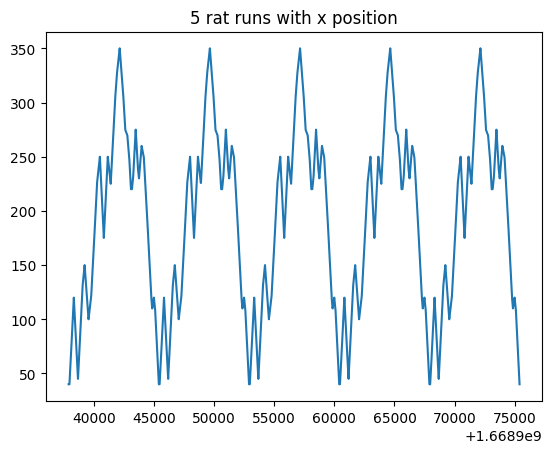

In [43]:
plot_rat_run_by_file("./Data/full_requests_beginning_to_end.txt", '5 rat runs with x position')

# Complete single run

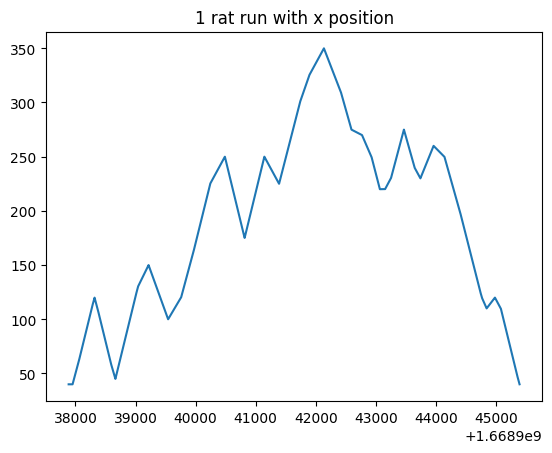

In [46]:
plot_rat_run_by_file("./Data/Single_Requests/sr1.txt", '1 rat run with x position')

# Data about each of the 5 runs (duration etc.)

In [47]:
total_duration_as_float_all = []

def print_single_rat_run_info(file_location):
    with open(file_location, 'r') as file:
        lines = file.readlines()

        first_line = json.loads(lines[0])
        last_line = json.loads(lines[len(lines)-1])
        
        first_line_timestamp_float = datetime_to_float(avisi_str_to_datetime(first_line['timestamp']))
        last_line_timestamp_float = datetime_to_float(avisi_str_to_datetime(last_line['timestamp']))
        
        total_duration_as_float = last_line_timestamp_float - first_line_timestamp_float
        total_duration_as_float_all.append(total_duration_as_float)
        
        start_dt_object = dt.datetime.fromtimestamp(first_line_timestamp_float)
        end_dt_object = dt.datetime.fromtimestamp(last_line_timestamp_float)
        
        print(file_location + " duration: " + str(end_dt_object - start_dt_object) + " as float: " + str(total_duration_as_float))
    
print_single_rat_run_info("./Data/Single_Requests/sr1.txt")
print_single_rat_run_info("./Data/Single_Requests/sr2.txt")
print_single_rat_run_info("./Data/Single_Requests/sr3.txt")
print_single_rat_run_info("./Data/Single_Requests/sr4.txt")
print_single_rat_run_info("./Data/Single_Requests/sr5.txt")

./Data/Single_Requests/sr1.txt duration: 2:05:04.577388 as float: 7504.577388048172
./Data/Single_Requests/sr2.txt duration: 2:05:04.161956 as float: 7504.161956071854
./Data/Single_Requests/sr3.txt duration: 2:05:04.799026 as float: 7504.799026012421
./Data/Single_Requests/sr4.txt duration: 2:05:04.277543 as float: 7504.277543067932
./Data/Single_Requests/sr5.txt duration: 2:05:04.734765 as float: 7504.734765052795


In [50]:
# print total of the 5 sums (7504.510135650635)
total = 0
for fl in total_duration_as_float_all:
    total += fl 
print("Average of the 5 runs: " + str(total / 5))

Average of the 5 runs: 7504.510135650635


# Duplicate the Y-axis of request one with a corresponding X-axis

In [69]:
# Add the total time to each line of the timestamp and keep the x_position value

file_location = "./Data/experiment/exp1.txt"

with open("./Data/Single_Requests/sr1.txt", 'r') as file: # File base
    lines = file.readlines()
    
with open(file_location, 'a') as file: # File to add new data to
    for line in lines:
        
        json_line = json.loads(line)
        #print(json_line)
        
        old_ts = datetime_to_float(avisi_str_to_datetime(json_line['timestamp']))
        new_ts = old_ts + 7504.510135650635
        
        new_datetime = float_to_datetime(new_ts)
        new_avisi_datetime = datetime_to_avisi_str(new_datetime)

        json_line['timestamp'] = new_avisi_datetime

        #print(json_line)
        file.write(json.dumps(json_line))
        file.write("\n")


{'x_position': 40.0, 'y_position': 205.0787928, 'timestamp': '2022-11-20T10:51:26.507705Z'}
{'x_position': 40.0, 'y_position': 205.0787928, 'timestamp': '2022-11-20T12:56:31.017841Z'}
{'x_position': 40.0, 'y_position': 205.2137, 'timestamp': '2022-11-20T10:51:27.098017Z'}
{'x_position': 40.0, 'y_position': 205.2137, 'timestamp': '2022-11-20T12:56:31.608153Z'}
{'x_position': 40.0, 'y_position': 205.3538573, 'timestamp': '2022-11-20T10:51:27.712358Z'}
{'x_position': 40.0, 'y_position': 205.3538573, 'timestamp': '2022-11-20T12:56:32.222494Z'}
{'x_position': 40.0, 'y_position': 205.4905907, 'timestamp': '2022-11-20T10:51:28.311573Z'}
{'x_position': 40.0, 'y_position': 205.4905907, 'timestamp': '2022-11-20T12:56:32.821709Z'}
{'x_position': 40.0, 'y_position': 205.6250413, 'timestamp': '2022-11-20T10:51:28.900544Z'}
{'x_position': 40.0, 'y_position': 205.6250413, 'timestamp': '2022-11-20T12:56:33.410680Z'}
{'x_position': 40.0, 'y_position': 205.7592637, 'timestamp': '2022-11-20T10:51:29.4889

{'x_position': 206.8547574, 'y_position': 450.0, 'timestamp': '2022-11-20T11:37:55.777312Z'}
{'x_position': 206.8547574, 'y_position': 450.0, 'timestamp': '2022-11-20T13:43:00.287448Z'}
{'x_position': 206.7189371, 'y_position': 450.0, 'timestamp': '2022-11-20T11:37:56.372960Z'}
{'x_position': 206.7189371, 'y_position': 450.0, 'timestamp': '2022-11-20T13:43:00.883096Z'}
{'x_position': 206.5840299, 'y_position': 450.0, 'timestamp': '2022-11-20T11:37:56.963137Z'}
{'x_position': 206.5840299, 'y_position': 450.0, 'timestamp': '2022-11-20T13:43:01.473273Z'}
{'x_position': 206.4488945, 'y_position': 450.0, 'timestamp': '2022-11-20T11:37:57.555552Z'}
{'x_position': 206.4488945, 'y_position': 450.0, 'timestamp': '2022-11-20T13:43:02.065688Z'}
{'x_position': 206.3135308, 'y_position': 450.0, 'timestamp': '2022-11-20T11:37:58.148264Z'}
{'x_position': 206.3135308, 'y_position': 450.0, 'timestamp': '2022-11-20T13:43:02.658400Z'}
{'x_position': 206.1809063, 'y_position': 450.0, 'timestamp': '2022-11

{'x_position': 231.2450594, 'y_position': 299.4466403, 'timestamp': '2022-11-20T12:20:56.613017Z'}
{'x_position': 231.2450594, 'y_position': 299.4466403, 'timestamp': '2022-11-20T14:26:01.123153Z'}
{'x_position': 231.3645844, 'y_position': 299.393518, 'timestamp': '2022-11-20T12:20:57.186642Z'}
{'x_position': 231.3645844, 'y_position': 299.393518, 'timestamp': '2022-11-20T14:26:01.696778Z'}
{'x_position': 231.4851524, 'y_position': 299.3399323, 'timestamp': '2022-11-20T12:20:57.764008Z'}
{'x_position': 231.4851524, 'y_position': 299.3399323, 'timestamp': '2022-11-20T14:26:02.274144Z'}
{'x_position': 231.6078064, 'y_position': 299.2854194, 'timestamp': '2022-11-20T12:20:58.352271Z'}
{'x_position': 231.6078064, 'y_position': 299.2854194, 'timestamp': '2022-11-20T14:26:02.862407Z'}
{'x_position': 231.7283744, 'y_position': 299.2318336, 'timestamp': '2022-11-20T12:20:58.930701Z'}
{'x_position': 231.7283744, 'y_position': 299.2318336, 'timestamp': '2022-11-20T14:26:03.440837Z'}
{'x_position

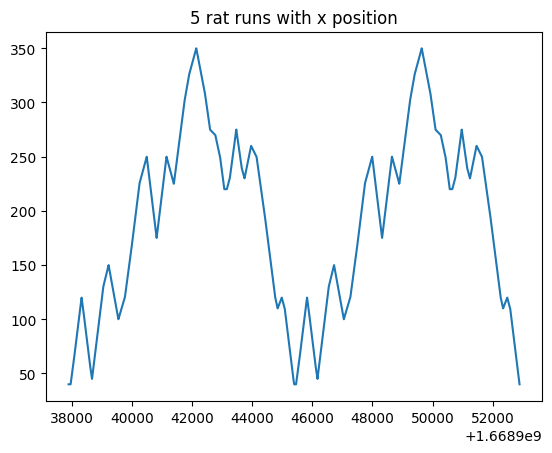

In [70]:
# Conclusion of experiment
plot_rat_run_by_file(".\Data\experiment\sr1_and_exp1_as_one.txt", '5 rat runs with x position')

# Testing the answer

In [71]:
res = datetime_to_float(avisi_str_to_datetime("2022-11-20T15:00:33.194779Z"))
print(res)

1668952833.194779


In [75]:
result_from_test = 1668952833.194779;

x_axis_array = []
y_axis_array = []

for line in get_data_x_position_coordinates_by_file_name(".\Data\experiment\sr1_and_exp1_as_one.txt"):
    x_axis_array.append(line[0])
    y_axis_array.append(line[1])

x = x_axis_array
y = y_axis_array

np.interp(result_from_test, x,y)

53.09660986747855

# Testing the answer with 5 complete rat runs

In [111]:
def do_n_rat_runs(n_of_runs):
    NEW_FILES_LOCATION = "./Data/MultipleRuns/Singles"
    BASE_FILE_LOCATION = "./Data/Single_Requests/sr1.txt"
    APPENDED_FILES_LOCATION = "./Data/MultipleRuns/appended_results.txt"
    
    for iteration in range(0, n_of_runs):
        print("Doing run " + str(iteration))
        file_name = "run" + str(iteration) + ".txt"
        new_file_location = NEW_FILES_LOCATION + "/" + file_name
        
        create_txt_file_for_single_run(file_name)
        write_new_values_to_txt_file(new_file_location, BASE_FILE_LOCATION)
        BASE_FILE_LOCATION = new_file_location        
    
def create_txt_file_for_single_run(file_name):
     open('./Data/MultipleRuns/Singles/' + file_name, 'w')
        
def write_new_values_to_txt_file(new_file, from_file):
    with open(from_file, 'r') as file: # File base
        lines = file.readlines()

    with open(APPENDED_FILES_LOCATION, 'a') as file: # File to add new data to
        for line in lines:

            json_line = json.loads(line)
            #print(json_line)

            old_ts = datetime_to_float(avisi_str_to_datetime(json_line['timestamp']))
            new_ts = old_ts + 7504.510135650635

            new_datetime = float_to_datetime(new_ts)
            new_avisi_datetime = datetime_to_avisi_str(new_datetime)

            json_line['timestamp'] = new_avisi_datetime

            #print(json_line)
            file.write(json.dumps(json_line))
            file.write("\n")

    with open(new_file, 'w') as file: # Newly created file
        for line in lines:

            json_line = json.loads(line)
            #print(json_line)

            old_ts = datetime_to_float(avisi_str_to_datetime(json_line['timestamp']))
            new_ts = old_ts + 7504.510135650635

            new_datetime = float_to_datetime(new_ts)
            new_avisi_datetime = datetime_to_avisi_str(new_datetime)

            json_line['timestamp'] = new_avisi_datetime

            #print(json_line)
            file.write(json.dumps(json_line))
            file.write("\n")    
        
do_n_rat_runs(50)
    

Doing run 0
Doing run 1
Doing run 2
Doing run 3
Doing run 4
Doing run 5
Doing run 6
Doing run 7
Doing run 8
Doing run 9
Doing run 10
Doing run 11
Doing run 12
Doing run 13
Doing run 14
Doing run 15
Doing run 16
Doing run 17
Doing run 18
Doing run 19
Doing run 20
Doing run 21
Doing run 22
Doing run 23
Doing run 24
Doing run 25
Doing run 26
Doing run 27
Doing run 28
Doing run 29
Doing run 30
Doing run 31
Doing run 32
Doing run 33
Doing run 34
Doing run 35
Doing run 36
Doing run 37
Doing run 38
Doing run 39
Doing run 40
Doing run 41
Doing run 42
Doing run 43
Doing run 44
Doing run 45
Doing run 46
Doing run 47
Doing run 48
Doing run 49


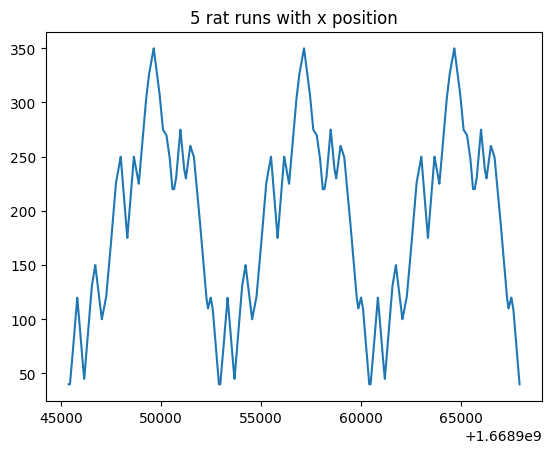

In [94]:
# Conclusion of e
plot_rat_run_by_file(r".\Data\MultipleRuns\appended_results.txt", '5 rat runs with x position')

In [109]:
def get_x_value_of_avisi_api(avisi_timestamp, result_location):
    res = datetime_to_float(avisi_str_to_datetime(avisi_timestamp))
    print("Float value of avisi timestamp: " + str(res))
    
    x_axis_array = []
    y_axis_array = []

    for line in get_data_x_position_coordinates_by_file_name(result_location):
        x_axis_array.append(line[0])
        y_axis_array.append(line[1])

    x = x_axis_array
    y = y_axis_array

    x_value_for_timestamp = np.interp(result_from_test, x,y)
    print("x_position for given timestamp is " + str(x_value_for_timestamp))
    return x_value_for_timestamp

In [110]:
x_value = get_x_value_of_avisi_api("2022-11-20T23:04:00.871724Z", r".\Data\MultipleRuns\appended_results.txt")

Float value of avisi timestamp: 1668981840.871724
x_position for given timestamp is 215.211036
